# Helmet Customer Segmentation using K-means

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')

In [2]:
kmean=pd.read_csv('helmetcsv.csv')
kmean.drop(columns=['Model/Type','Standard','POS Receive Date','POS Delivery Date','Other'],inplace=True)

In [3]:
kmean.head()

,Customer,Destination,Time Differences,Modification,XXS,XS (48),XS/S,S(50),M(52),L(54),XL(56),XXL,3XL,4XL,S/M,L/XL,Total Helmet,Receive Year,Delivery Year
0,AMR INDUSTRY,THAILAND,9,no,0,0,0,6,8,4,0,0,0,0,0,0,18,2016,2016
1,AMR INDUSTRY,THAILAND,1,no,0,0,0,1,3,2,1,1,1,0,0,0,9,2016,2016
2,AMR INDUSTRY,THAILAND,1,no,0,0,0,1,3,2,1,1,1,0,0,0,9,2016,2016
3,AMR INDUSTRY,THAILAND,1,no,0,0,0,2,3,2,1,1,0,0,0,0,9,2016,2016
4,AMR INDUSTRY,THAILAND,1,no,0,0,0,2,3,2,1,1,0,0,0,0,9,2016,2016


In [4]:
len(kmean) 

7270

In [5]:
kmean.describe().T 

,count,mean,std,min,25%,50%,75%,max
Time Differences,7270.0,9.468363,14.792043,0.0,1.0,1.0,15.0,90.0
XXS,7270.0,0.001100,0.052442,0.0,0.0,0.0,0.0,3.0
XS (48),7270.0,1.792572,7.009704,0.0,0.0,0.0,0.0,348.0
XS/S,7270.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
S(50),7270.0,6.111692,22.212878,0.0,0.0,0.0,6.0,810.0
M(52),7270.0,13.467400,30.211962,0.0,0.0,4.0,16.0,800.0
L(54),7270.0,20.968913,46.587129,0.0,1.0,6.0,20.0,1000.0
XL(56),7270.0,6.821183,17.389557,0.0,0.0,1.0,6.0,500.0
XXL,7270.0,8.994085,37.432356,0.0,0.0,0.0,1.0,867.0
3XL,7270.0,0.137964,3.789927,0.0,0.0,0.0,0.0,192.0


Text(0.5, 0, 'Time/Total')

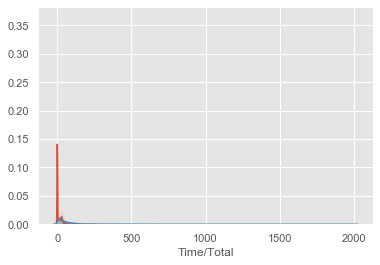

In [6]:
#Visualising the data
plot_time = sns.distplot(kmean['Time Differences'])
plot_grandtotal = sns.distplot(kmean['Total Helmet'])
plt.xlabel('Time/Total')

[(0, 420)]

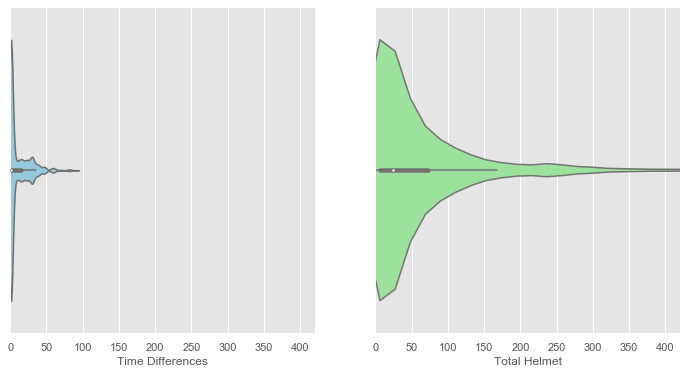

In [7]:
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
v1 = sns.violinplot(data=kmean, x='Time Differences', color="skyblue",ax=axes[0])
v2 = sns.violinplot(data=kmean, x='Total Helmet',color="lightgreen", ax=axes[1])
v1.set(xlim=(0,420))

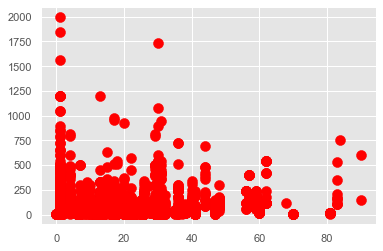

In [8]:
# Plotting the values to understand the spread
Time = kmean['Time Differences'].values
Total = kmean['Total Helmet'].values
X = np.array(list(zip(Time, Total)))
plt.scatter(Time,Total, c='red', s=100)

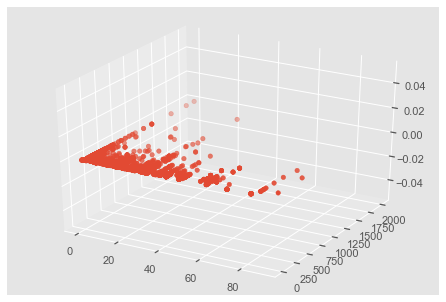

In [9]:
##plot in 3D space
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1])

## Clustering fundamentals

In [10]:
X=kmean.iloc[:,[2,16]].values

In [11]:
X

array([[ 9, 18],
       [ 1,  9],
       [ 1,  9],
       ...,
       [ 1,  6],
       [ 1,  6],
       [ 2,  3]], dtype=int64)

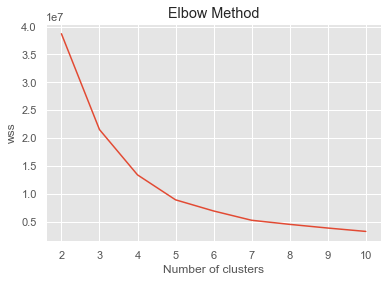

In [12]:
#Using the elbow method to find the ideal number of clusters
from sklearn.cluster import KMeans
wss = []
for i in range(2,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wss.append(km.inertia_)
plt.plot(range(2,11),wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wss')
plt.show()
    

In [13]:
for k in range (2, 11):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans_model.labels_
    interia = kmeans_model.inertia_
    print ("k:",k, " cost:", interia)
print()

k: 2  cost: 38708123.424701765
k: 3  cost: 21510420.612582363
k: 4  cost: 13380450.949121732
k: 5  cost: 8900957.975408899
k: 6  cost: 6733503.829565467
k: 7  cost: 5221398.539155405
k: 8  cost: 4429805.278182976
k: 9  cost: 3735039.3731460096
k: 10  cost: 3210026.312635259



In [14]:
#Calculating the silhoutte coefficient
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.7958006947536669
For n_clusters=3, The Silhouette Coefficient is 0.7647766246028229
For n_clusters=4, The Silhouette Coefficient is 0.6348520742529189
For n_clusters=5, The Silhouette Coefficient is 0.612115227984998
For n_clusters=6, The Silhouette Coefficient is 0.61315319827338
For n_clusters=7, The Silhouette Coefficient is 0.5452087428768366
For n_clusters=8, The Silhouette Coefficient is 0.4941596889231463
For n_clusters=9, The Silhouette Coefficient is 0.48287713149755407
For n_clusters=10, The Silhouette Coefficient is 0.5244682154719118


In [15]:
#Fitting kmeans to the dataset
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)

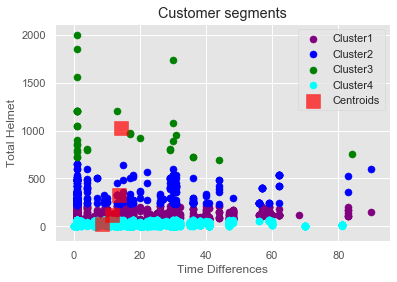

In [16]:
#Visualising the clusters for k=4
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')

plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Time Differences')
plt.ylabel('Total Helmet')
plt.legend()
plt.show()

In [17]:
kmean['Category'] = km4.labels_

In [22]:
kmean.to_csv(r'C:\Users\krnjy\Documents\Final Project\kmean.csv',index=False)